In [1]:
import arviz as az
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use("plotting.mplstyle")
import numpy as np
import sys
sys.path.append("./../code/")
from population_model import massModel,truncatedNormal
from tqdm import tqdm
import h5py

cbbh = '#1f78b4'
cnsbh = '#33a02c'
cbns = '#e31a1c'
cmisc = '#6a3d9a'

In [2]:
# Load results
inj_samps = h5py.File('../data/popsummary_standardInjections.h5','r')
nn_samps = h5py.File('../data/popsummary_dynamicInjections.h5','r')

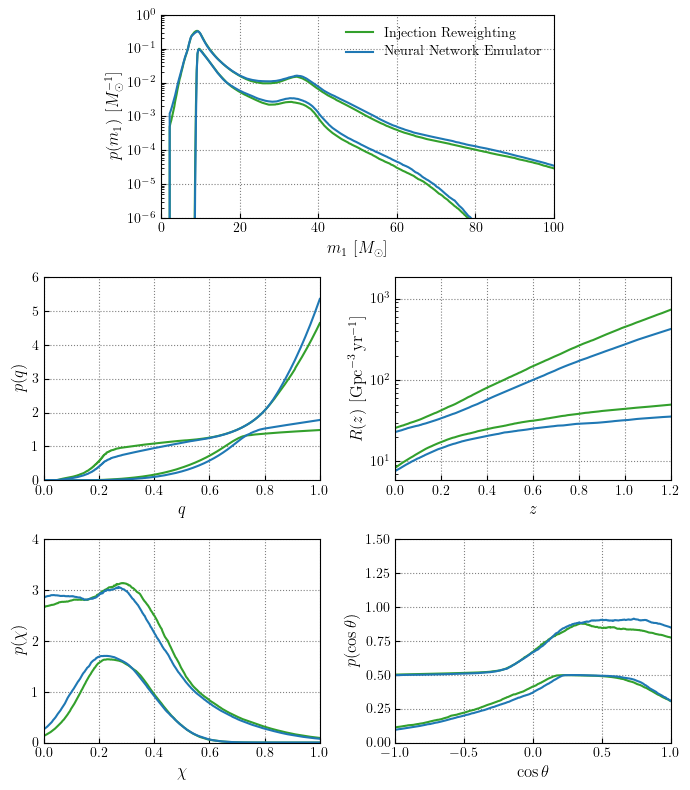

In [4]:
# Plot precomputed probability densities/rates, as stored in popsummary files
fig = plt.figure(figsize=(7.,8))

## Primary mass
ax = plt.subplot2grid(shape=(3, 6), loc=(0, 1), colspan=4)

ax.plot(inj_samps['posterior/rates_on_grids/p_mass1/positions'][0],
        np.quantile(inj_samps['posterior/rates_on_grids/p_mass1/rates'][()], 0.05, axis=0),
        color=cnsbh, lw=1.5, label='Injection Reweighting')
ax.plot(inj_samps['posterior/rates_on_grids/p_mass1/positions'][0],
        np.quantile(inj_samps['posterior/rates_on_grids/p_mass1/rates'][()], 0.95, axis=0),
        color=cnsbh, lw=1.5)
ax.plot(nn_samps['posterior/rates_on_grids/p_mass1/positions'][0],
        np.quantile(nn_samps['posterior/rates_on_grids/p_mass1/rates'][()], 0.05, axis=0),
        color=cbbh, lw=1.5, label='Neural Network Emulator')
ax.plot(nn_samps['posterior/rates_on_grids/p_mass1/positions'][0],
        np.quantile(nn_samps['posterior/rates_on_grids/p_mass1/rates'][()], 0.95, axis=0),
        color=cbbh, lw=1.5)
ax.set_yscale('log')
ax.set_xlim(0,100)
ax.set_ylim(1e-6,1)
ax.set_xlabel('$m_1$ $[M_\odot]$')
ax.set_ylabel('$p(m_1)$ $[M_\odot^{-1}]$')
ax.legend(loc='upper right')

## Mass ratio
ax = plt.subplot2grid(shape=(3, 6), loc=(1, 0), colspan=3)

ax.plot(inj_samps['posterior/rates_on_grids/p_mass_ratio/positions'][0],
        np.quantile(inj_samps['posterior/rates_on_grids/p_mass_ratio/rates'][()], 0.05, axis=0),
        color=cnsbh, lw=1.5)
ax.plot(inj_samps['posterior/rates_on_grids/p_mass_ratio/positions'][0],
        np.quantile(inj_samps['posterior/rates_on_grids/p_mass_ratio/rates'][()], 0.95, axis=0),
        color=cnsbh, lw=1.5)
ax.plot(nn_samps['posterior/rates_on_grids/p_mass_ratio/positions'][0],
        np.quantile(nn_samps['posterior/rates_on_grids/p_mass_ratio/rates'][()], 0.05, axis=0),
        color=cbbh, lw=1.5)
ax.plot(nn_samps['posterior/rates_on_grids/p_mass_ratio/positions'][0],
        np.quantile(nn_samps['posterior/rates_on_grids/p_mass_ratio/rates'][()], 0.95, axis=0),
        color=cbbh, lw=1.5)
ax.set_xlim(0,1)
ax.set_ylim(0,6)
ax.set_xlabel('$q$')
ax.set_ylabel('$p(q)$')

## Redshift
ax = plt.subplot2grid(shape=(3, 6), loc=(1, 3), colspan=3)

ax.plot(inj_samps['posterior/rates_on_grids/rate_vs_redshift/positions'][0],
        np.quantile(inj_samps['posterior/rates_on_grids/rate_vs_redshift/rates'][()],0.05, axis=0),
        color=cnsbh, lw=1.5)
ax.plot(inj_samps['posterior/rates_on_grids/rate_vs_redshift/positions'][0],
        np.quantile(inj_samps['posterior/rates_on_grids/rate_vs_redshift/rates'][()], 0.95, axis=0),
        color=cnsbh, lw=1.5)
ax.plot(nn_samps['posterior/rates_on_grids/rate_vs_redshift/positions'][0],
        np.quantile(nn_samps['posterior/rates_on_grids/rate_vs_redshift/rates'][()], 0.05, axis=0),
        color=cbbh, lw=1.5)
ax.plot(nn_samps['posterior/rates_on_grids/rate_vs_redshift/positions'][0],
        np.quantile(nn_samps['posterior/rates_on_grids/rate_vs_redshift/rates'][()], 0.95, axis=0),
        color=cbbh, lw=1.5)
ax.set_yscale('log')
ax.set_xlim(0,1.2)
ax.set_xlabel('$z$')
ax.set_ylabel('$R(z)$ $[\mathrm{Gpc}^{-3}\,\mathrm{yr}^{-1}]$')

## Spin magnitude
ax = plt.subplot2grid(shape=(3, 6), loc=(2, 0), colspan=3)

ax.plot(inj_samps['posterior/rates_on_grids/p_chi/positions'][0],
        np.quantile(inj_samps['posterior/rates_on_grids/p_chi/rates'][()],0.05, axis=0),
        color=cnsbh, lw=1.5)
ax.plot(inj_samps['posterior/rates_on_grids/p_chi/positions'][0],
        np.quantile(inj_samps['posterior/rates_on_grids/p_chi/rates'][()], 0.95, axis=0),
        color=cnsbh, lw=1.5)
ax.plot(nn_samps['posterior/rates_on_grids/p_chi/positions'][0],
        np.quantile(nn_samps['posterior/rates_on_grids/p_chi/rates'][()], 0.05, axis=0),
        color=cbbh, lw=1.5)
ax.plot(nn_samps['posterior/rates_on_grids/p_chi/positions'][0],
        np.quantile(nn_samps['posterior/rates_on_grids/p_chi/rates'][()], 0.95, axis=0),
        color=cbbh, lw=1.5)
ax.set_xlabel('$\chi$')
ax.set_ylabel('$p(\chi)$')
ax.set_xlim(0,1)
ax.set_ylim(0,4)

## Spin tilt
ax = plt.subplot2grid(shape=(3, 6), loc=(2, 3), colspan=3)

ax.plot(inj_samps['posterior/rates_on_grids/p_cos_theta/positions'][0],
        np.quantile(inj_samps['posterior/rates_on_grids/p_cos_theta/rates'][()],0.05, axis=0),
        color=cnsbh, lw=1.5)
ax.plot(inj_samps['posterior/rates_on_grids/p_cos_theta/positions'][0],
        np.quantile(inj_samps['posterior/rates_on_grids/p_cos_theta/rates'][()], 0.95, axis=0),
        color=cnsbh, lw=1.5)
ax.plot(nn_samps['posterior/rates_on_grids/p_cos_theta/positions'][0],
        np.quantile(nn_samps['posterior/rates_on_grids/p_cos_theta/rates'][()], 0.05, axis=0),
        color=cbbh, lw=1.5)
ax.plot(nn_samps['posterior/rates_on_grids/p_cos_theta/positions'][0],
        np.quantile(nn_samps['posterior/rates_on_grids/p_cos_theta/rates'][()], 0.95, axis=0),
        color=cbbh, lw=1.5)
ax.set_xlabel('$\cos\\theta$')
ax.set_ylabel('$p(\cos\\theta)$')
ax.set_xlim(-1,1)
ax.set_ylim(0,1.5)

plt.tight_layout()
plt.savefig('figure_08.pdf',bbox_inches='tight')
plt.show()